<a href="https://colab.research.google.com/github/thiagosantos346/PNL_MODELS/blob/master/myFirstGan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating new MNIST images with GANs and
Keras

1. Do imports


In [0]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.layers import BatchNormalization, Input, Dense, Reshape, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam

2. Implement the build_generator function. In this example, we'll use a simple
fully-connected generator. However, we'll still follow the guidelines outlined in the DCGAN section

In [0]:
def build_generator(latent_dim : int):
  model = Sequential([
    Dense(128, input_dim=latent_dim),
    LeakyReLU(alpha=0.2),
    BatchNormalization(momentum=0.8),
    Dense(256),
    LeakyReLU(alpha=0.2),
    BatchNormalization(momentum=0.8),
    Dense(512),
    LeakyReLU(alpha=0.2),
    BatchNormalization(momentum=0.8),
    Dense(np.prod((28, 28, 1)), activation='tanh'),
    Reshape((28, 28, 1))
  ])

  model.summary()
  z = Input(shape=(latent_dim,))

  genereted = model(z)

  return Model(z, genereted)

2. Build the discriminator. Again, it's a simple, fully-connected network:

In [0]:
def build_descriminator():
  model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(256),
    LeakyReLU(alpha=0.2),
    Dense(128),
    LeakyReLU(alpha=0.2),
    Dense(1, activation='sigmoid')
  ], name='discriminator')

  model.summary()

  image = Input(shape=(28, 28, 1))
  output = model(image)

  return Model(image, output)

4. Implement the train function with the actual GAN training. This function
implements the procedure outlined in the Training GANs,Putting it all together
section:

In [0]:
def train(generator, discriminator, combined, steps, batch_size):
  (x_train, _), _ = mnist.load_data()

  x_train = (x_train.astype(np.float32) - 127.5) / 127.5
  x_train = np.expand_dims(x_train, axis=-1)

  real = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))

  latent_dim = generator.input_shape[1]

  for step in range(steps) :

    real_images = x_train[
      np.random.randint(
        0,
        x_train.shape[0],
        batch_size 
      )
    ]

    noise = np.random.normal(
      0,
      1,
      (
        batch_size,
        latent_dim
      )
    )

    generated_images = generator.predict(noise)

    # Treinando o descriminador
    discriminator_real_loss = discriminator.train_on_batch(
      real_images,
      real
    )

    discriminator_fake_loss = discriminator.train_on_batch(
      generated_images,
      fake
    )

    discriminator_loss = 0.5 * np.add(
      discriminator_real_loss,
      discriminator_real_loss
    )

    # Treinando o gerador
    noise = np.random.normal(
      0,
      1,
      (
        batch_size,
        latent_dim
      )
    )

    generator_loss = combined.train_on_batch(noise, real)

    print( 'Step {}'.foramt(step) )


5. Implement a boilerplate function,plot_generated_images, to display some
generated images after the training is finished:
  1. Create an nxn grid (the figure variable).
  2. Create nxn random latent vectors (the noise variable), one for each
  generated image.
  3. Generate the images and place them in the grid cells.
  4. Display the result.

The following is the implementation:

In [0]:
def plot_generated_images(generator):
  n = 10
  digit_size = 28

  figure = np.zeros(
    (
      digit_size * n,
      digit_size * n
    )
  )

  latent_dim = generator.input_shape[1]

  noise = np.random.normal(0,  1, (n * n, latent_dim))
  generated_images = generator.predict(noise)

  for i in range(n):
    for j in range(n):
      slice_i = slice(
        i * digit_size,
        (i + 1) * digit_size
      )

      slice_j = slice(
        j * digit_size,
        (j + 1) * digit_size
      )

      figure[slice_i, slice_j] = np.reshape(
        generated_images[i * n + j],
        (28, 28)
      )

      plt.figure(figsize=(6, 5))
      plt.axis('off')
      plt.imshow(figure, cmap='Greys_r')
      plt.show()

6. Build the generator, discriminator, and the combined network. Run the training
for 15,000 steps using the Adam optimizer, and plot the results once it's done:

In [0]:
if __name__ == '__main__':
  latent_dim = 64

  # Build and Compile the discriminator
  discriminator = build_descriminator()

  discriminator.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.0002, beta_1=0.5),
    metrics=['accuracy']
  )

  # Build the generator
  generator = build_generator(latent_dim)
  
  # Generator input z
  z = Input(shape=(latent_dim,))
  generated_image = generator(z)

  discriminator.trainable = False

  real_or_fake = discriminator(generated_image)

  combined = Model(z, real_or_fake)
  combined.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.0002, beta_1=0.5)
  )

  # Train the GAN sytem
  train(
    generator=generator,
    discriminator=discriminator,
    combined=combined,
    steps=15000,
    batch_size=128
  )

  



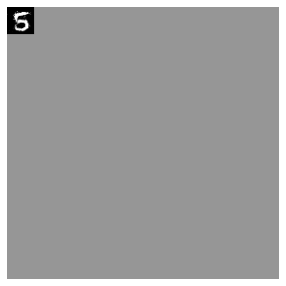

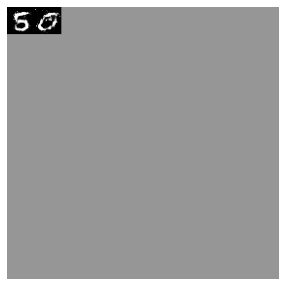

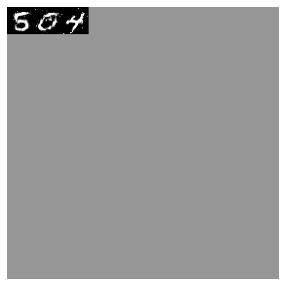

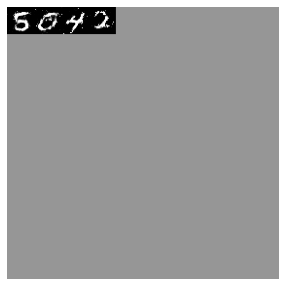

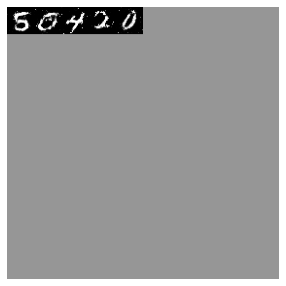

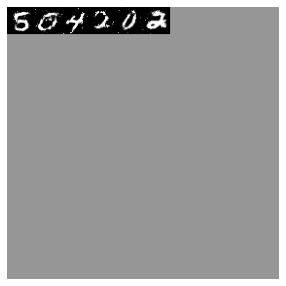

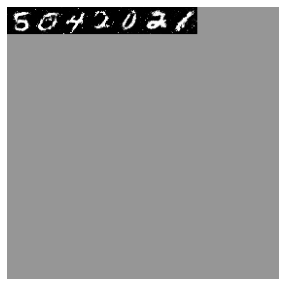

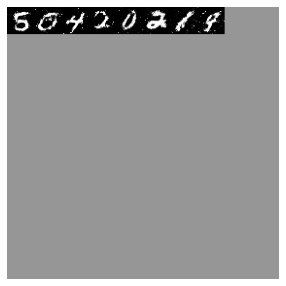

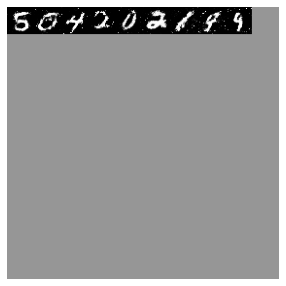

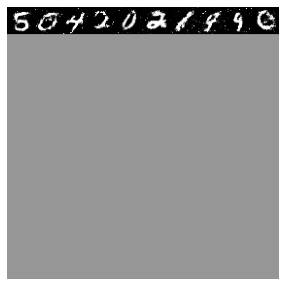

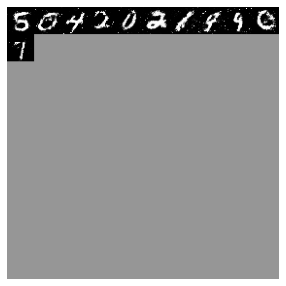

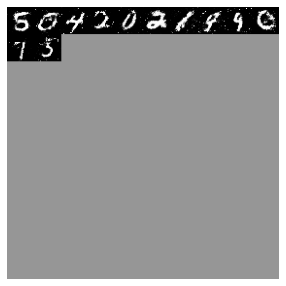

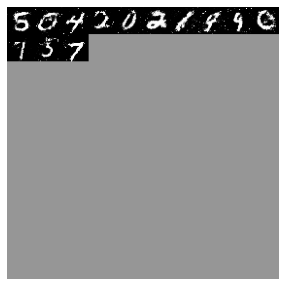

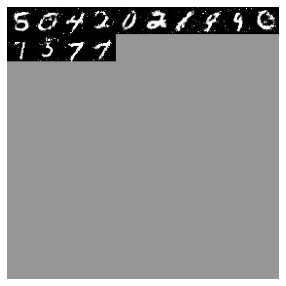

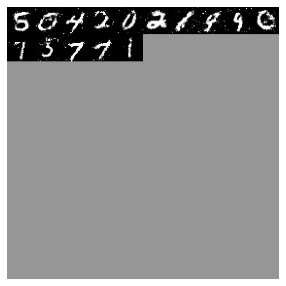

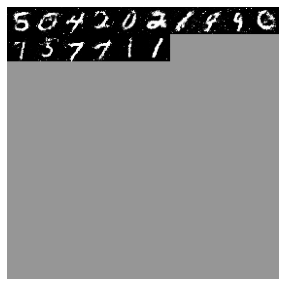

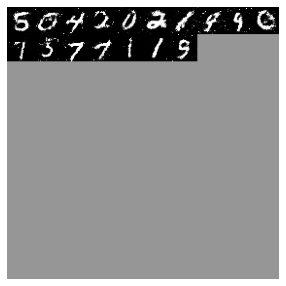

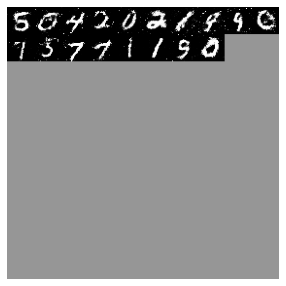

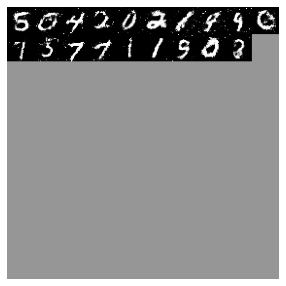

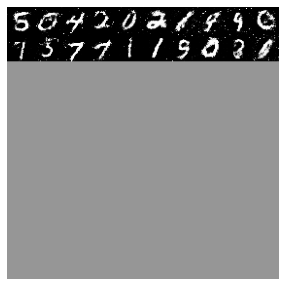

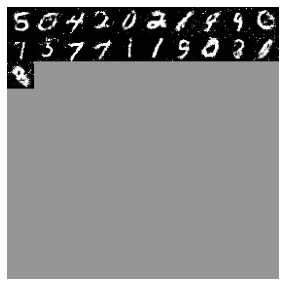

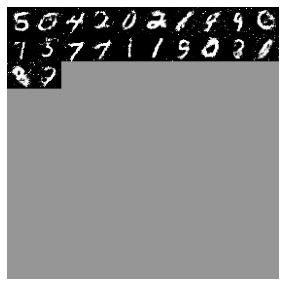

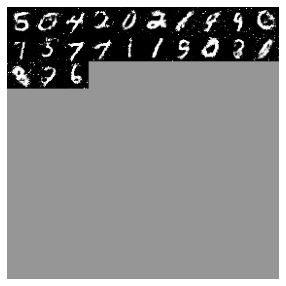

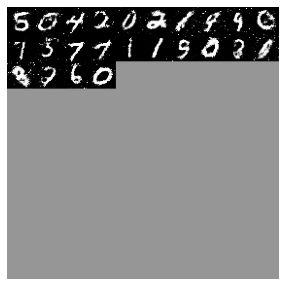

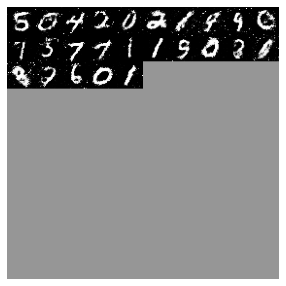

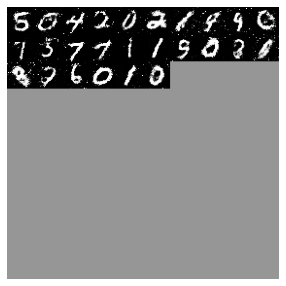

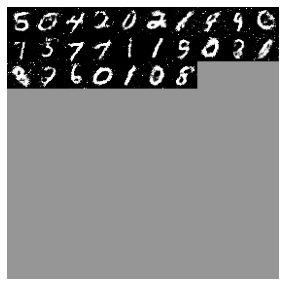

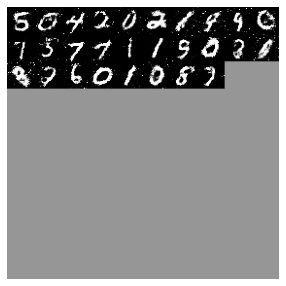

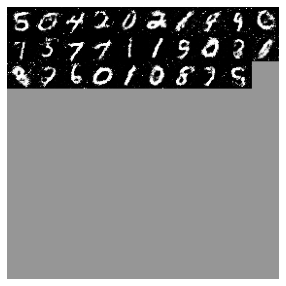

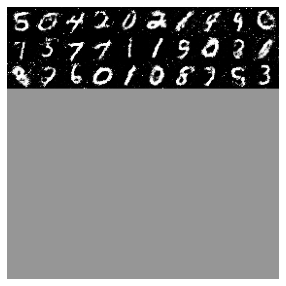

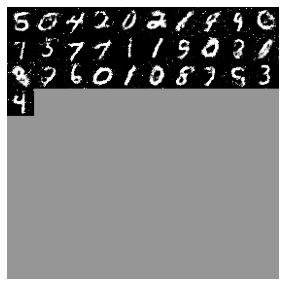

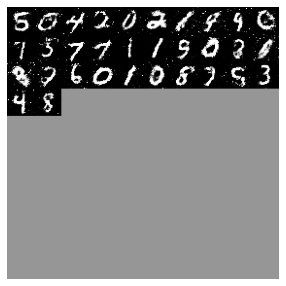

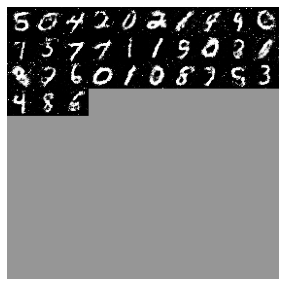

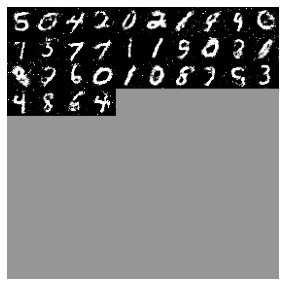

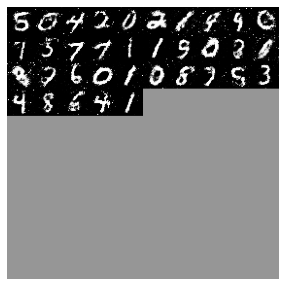

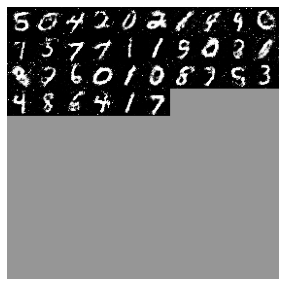

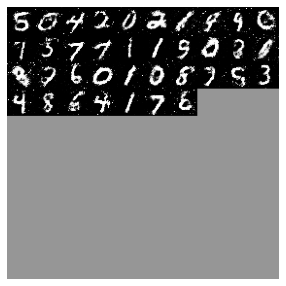

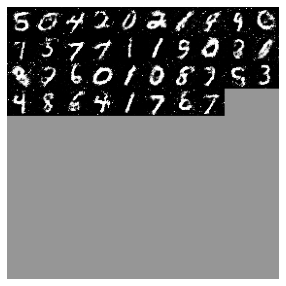

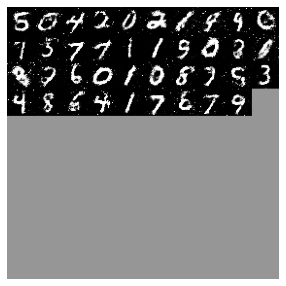

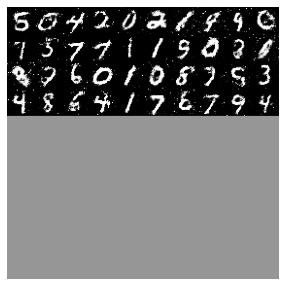

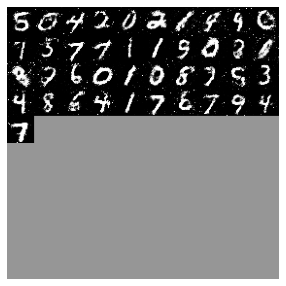

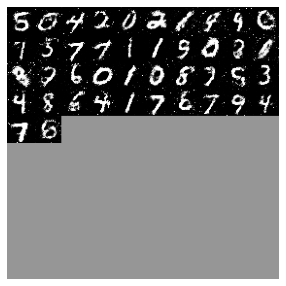

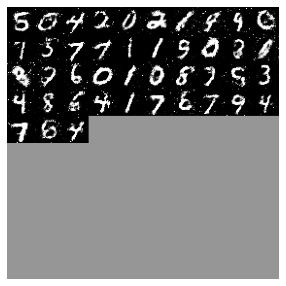

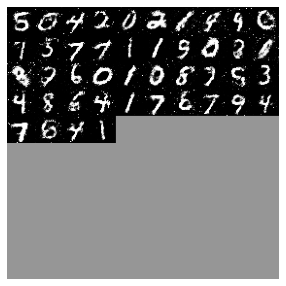

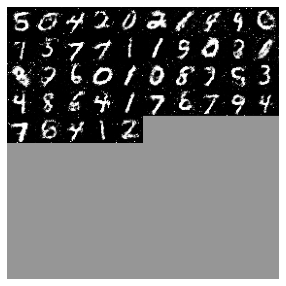

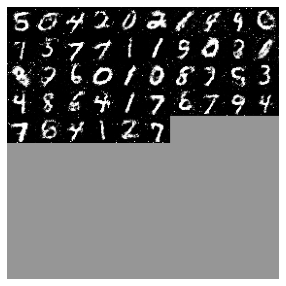

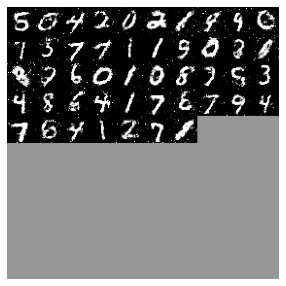

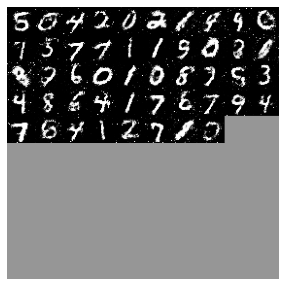

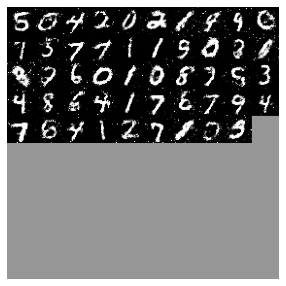

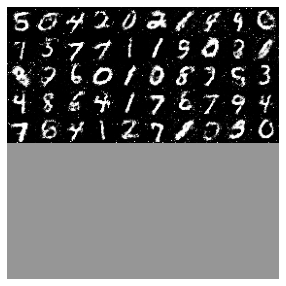

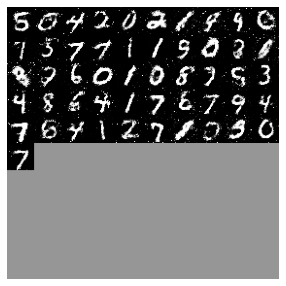

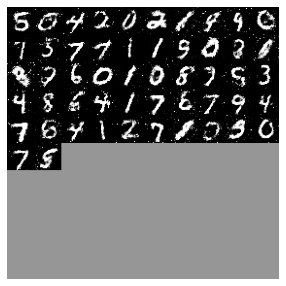

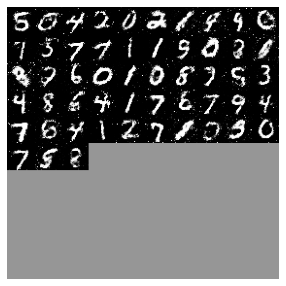

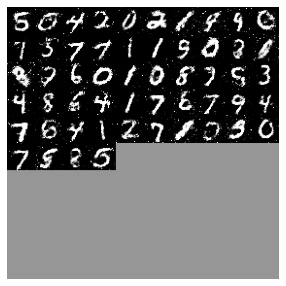

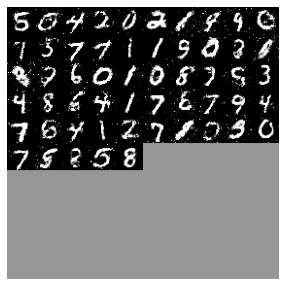

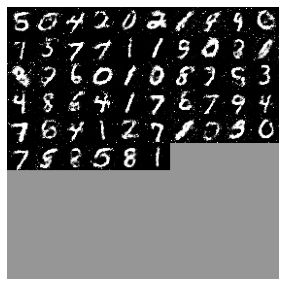

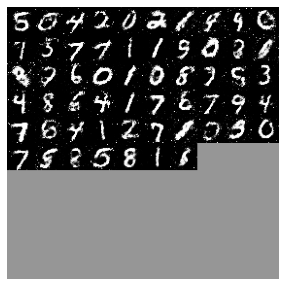

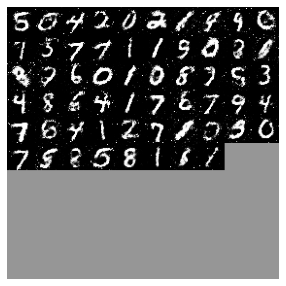

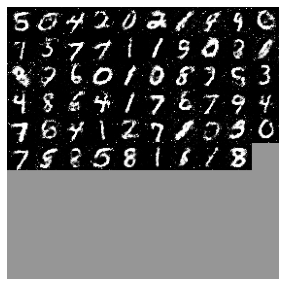

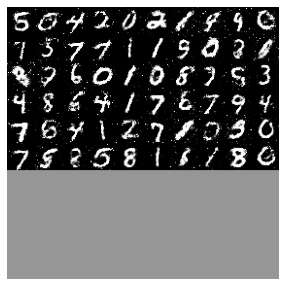

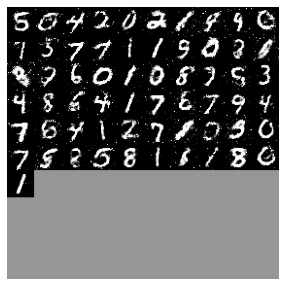

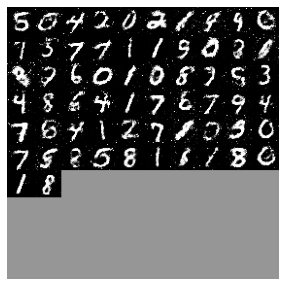

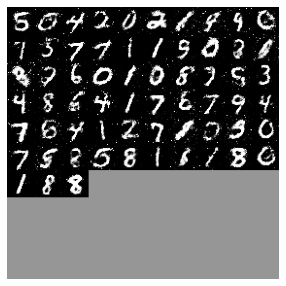

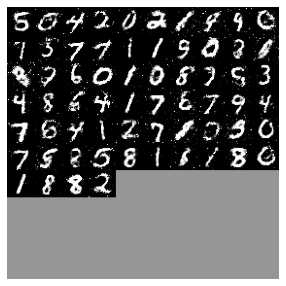

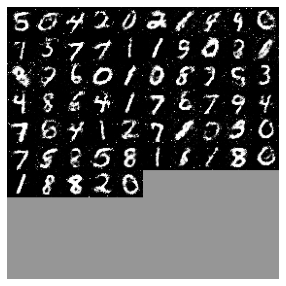

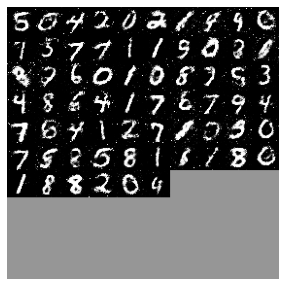

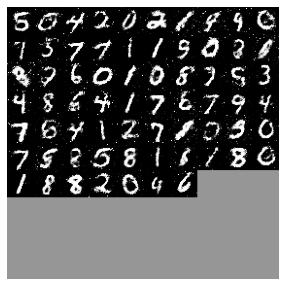

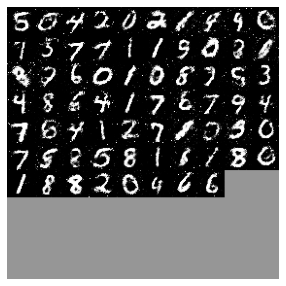

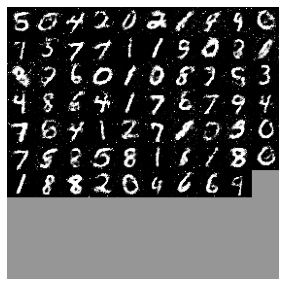

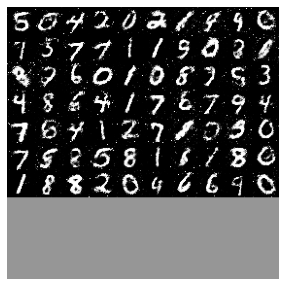

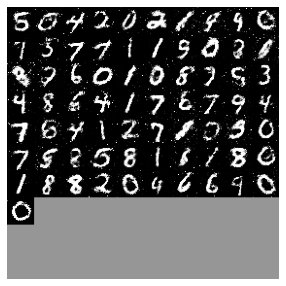

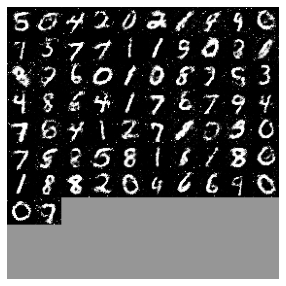

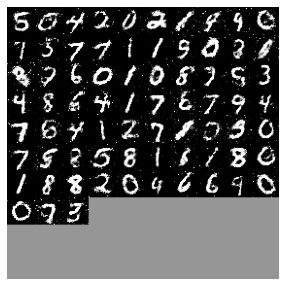

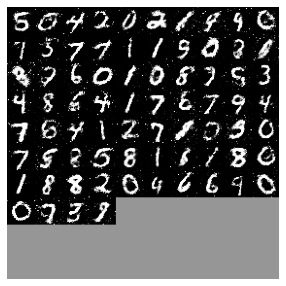

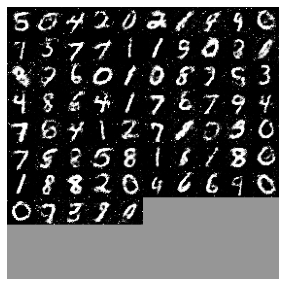

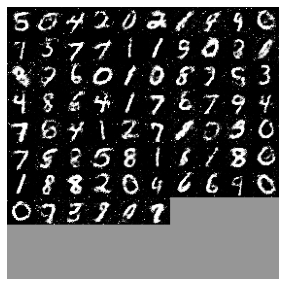

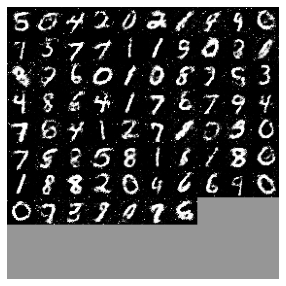

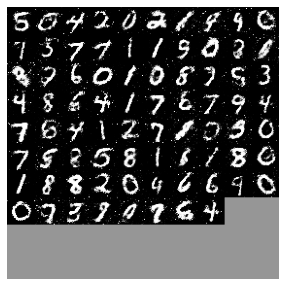

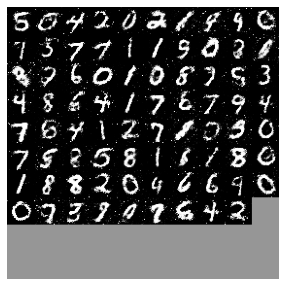

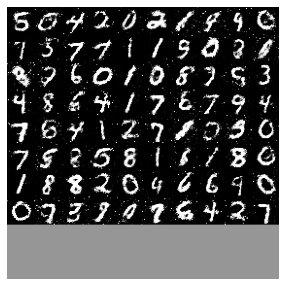

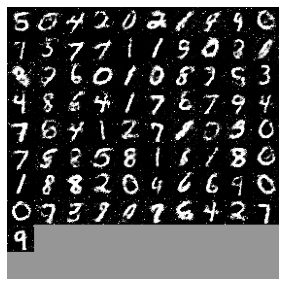

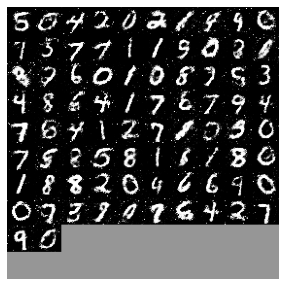

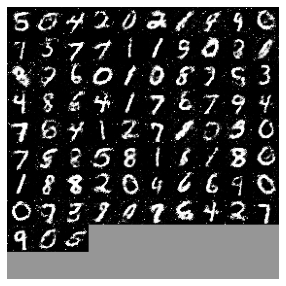

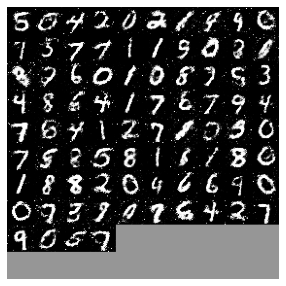

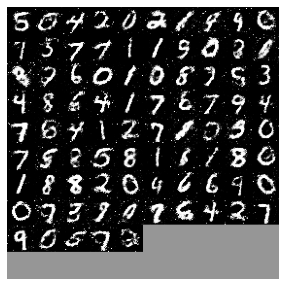

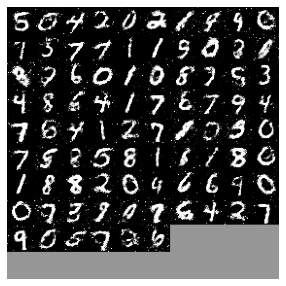

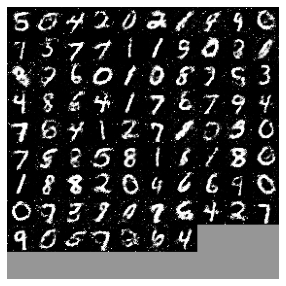

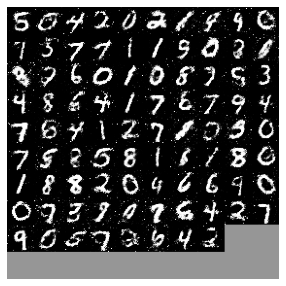

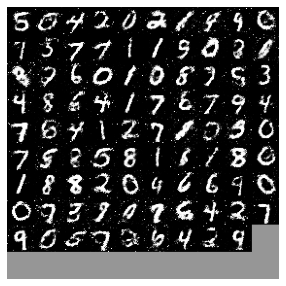

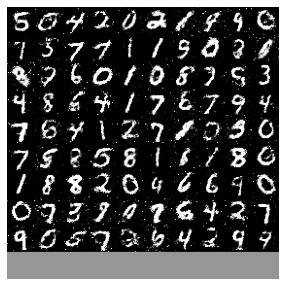

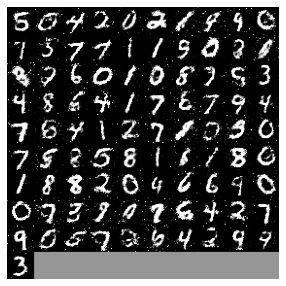

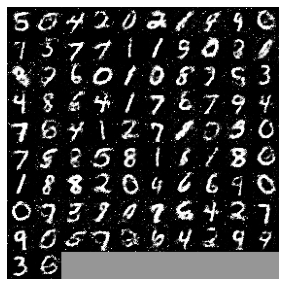

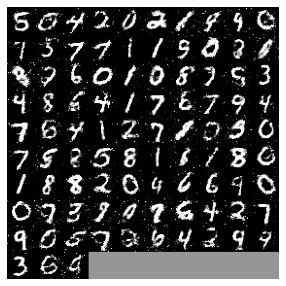

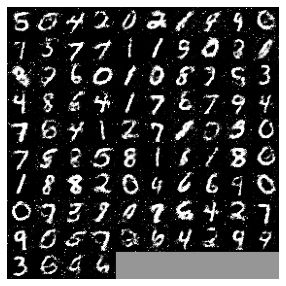

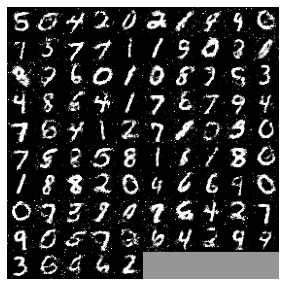

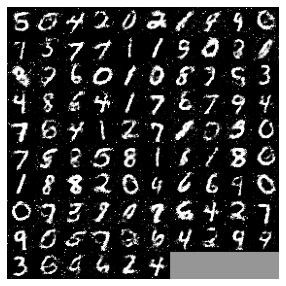

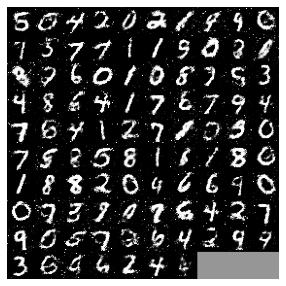

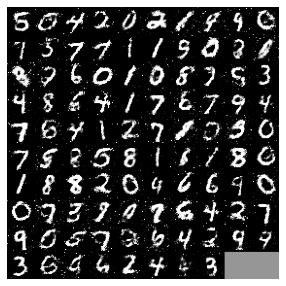

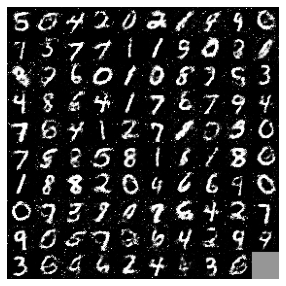

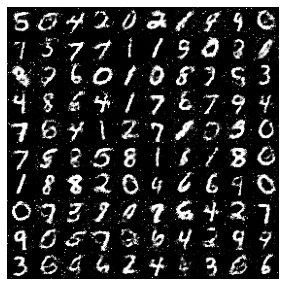

In [34]:
plot_generated_images(generator)